<a href="https://colab.research.google.com/github/mits-ds/Udemy_TF2/blob/main/MM_TF2_0_LSTM_Nonlinear_(v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.2


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

This is a time series of the form:

$$ x(t) = \sin(\omega t^2) $$

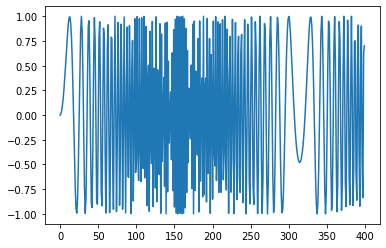

In [4]:
# plot it
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [6]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 24ms/step - loss: 1.4258 - val_loss: 1.0477
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 1.1596 - val_loss: 1.0239
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.9681 - val_loss: 1.0029
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8422 - val_loss: 0.9811
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7605 - val_loss: 0.9457
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6971 - val_loss: 0.8949
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6489 - val_loss: 0.8431
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6134 - val_loss: 0.8013
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5817 - val_loss: 0.7626
Epoch 10/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5591 - val_loss: 0.7302
Epoch 11/80
7/7 [==============================] 

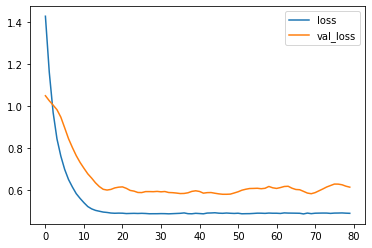

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


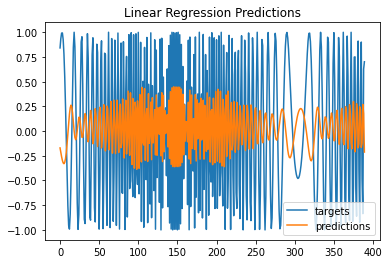

In [8]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

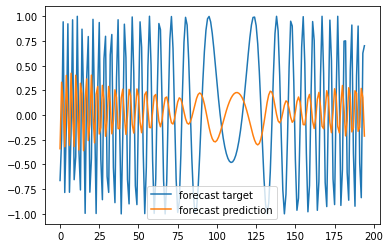

In [9]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

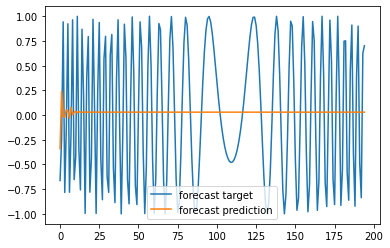

In [10]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [11]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 4s 70ms/step - loss: 0.5695 - val_loss: 0.5183
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5139 - val_loss: 0.5680
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4965 - val_loss: 0.5472
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4830 - val_loss: 0.5888
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4661 - val_loss: 0.5871
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4393 - val_loss: 0.5723
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4296 - val_loss: 0.5120
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3881 - val_loss: 0.4259
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2975 - val_loss: 0.3927
Epoch 10/200
7/7 [==============================] - 0s 8ms/step - loss: 0.2389 - val_loss: 0.3047
Epoch 11/200
7/7 [===================

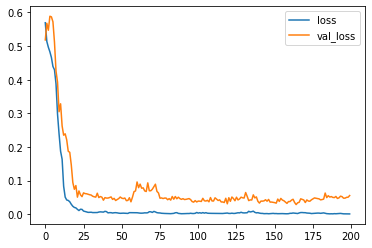

In [12]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


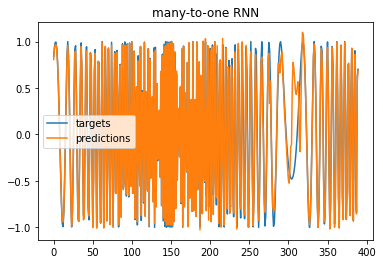

In [13]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

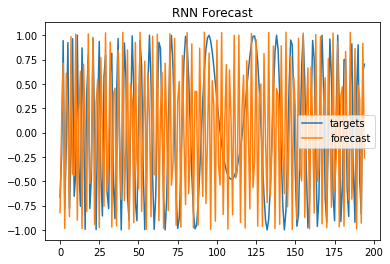

In [14]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()